# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-12 09:00:04.236028


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/11/20


,12/11/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,15842789,295450,1.86
Brazil,6836227,180437,2.64
India,9826775,142628,1.45
Mexico,1229379,113019,9.19
United Kingdom,1814395,63603,3.51
Italy,1805873,63387,3.51
France,2405210,57671,2.40


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/11/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
57197,US,15386562,2020-12-09,289373.0,3124.0,221267.0,209233.285714
57196,US,15165295,2020-12-08,286249.0,2546.0,215878.0,206210.428571
57195,US,14949417,2020-12-07,283703.0,1404.0,192435.0,201176.000000
57194,US,14756982,2020-12-06,282299.0,1113.0,175664.0,196235.428571
57193,US,14581318,2020-12-05,281186.0,2254.0,213881.0,190945.285714
57192,US,14367437,2020-12-04,278932.0,2607.0,227828.0,182659.428571
57191,US,14139609,2020-12-03,276325.0,2879.0,217680.0,179471.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/11/20


,12/11/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,753837,35357.0,4.69
Texas,1388909,24143.0,1.74
California,1516215,20787.0,1.37
Florida,1106396,19714.0,1.78
New Jersey,390256,17662.0,4.53
Illinois,832951,15067.0,1.81
Pennsylvania,476249,12183.0,2.56


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/11/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1947,California,1448987,2020-12-09,20411.0,206.0,33591.0,26257.857143
1946,California,1415396,2020-12-08,20205.0,190.0,24568.0,24193.428571
1945,California,1390828,2020-12-07,20015.0,87.0,24155.0,22937.714286
1944,California,1366673,2020-12-06,19928.0,58.0,28732.0,21602.571429
1943,California,1337941,2020-12-05,19870.0,136.0,27634.0,19616.714286
1942,California,1310307,2020-12-04,19734.0,181.0,23757.0,17818.714286
1941,California,1286550,2020-12-03,19553.0,143.0,21368.0,16392.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/11/20


,12/11/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,501635,8199.0,1.63
Orange,97302,1662.0,1.71
Riverside,112950,1573.0,1.39
San Bernardino,120186,1209.0,1.01
San Diego,99601,1114.0,1.12
Sacramento,46479,659.0,1.42
Fresno,42461,542.0,1.28


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/11/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6172,Los Angeles,475271,2020-12-09,8075.0,75.0,8950.0,8726.571429
6171,Los Angeles,466321,2020-12-08,8000.0,64.0,8441.0,8275.000000
6170,Los Angeles,457880,2020-12-07,7936.0,27.0,8029.0,8137.285714
6169,Los Angeles,449851,2020-12-06,7909.0,23.0,10443.0,7715.428571
6168,Los Angeles,439408,2020-12-05,7886.0,44.0,8825.0,6931.000000
6167,Los Angeles,430583,2020-12-04,7842.0,60.0,8702.0,6112.857143
6166,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857
6165,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857
6164,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6163,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857



7 day new US cases as of 12/11/20


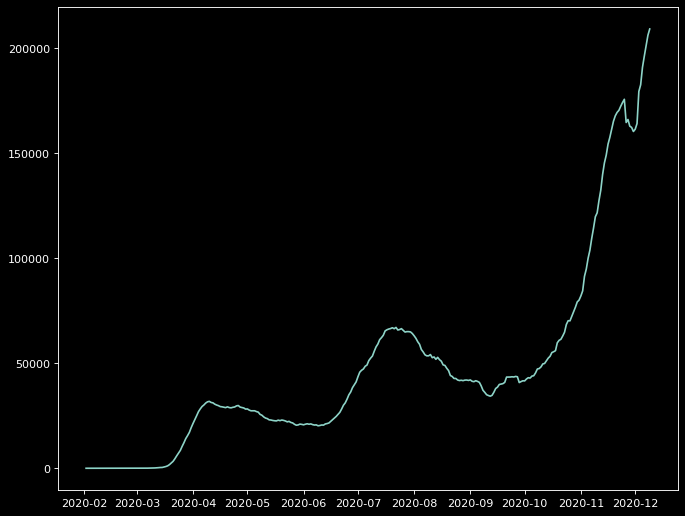

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/11/20


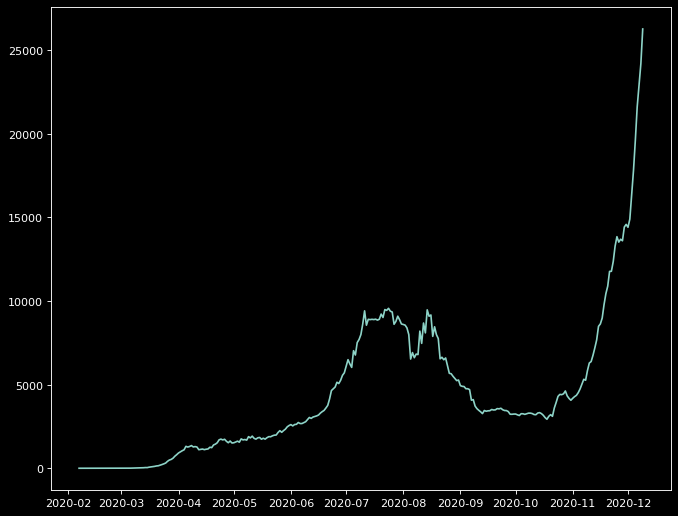

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/11/20


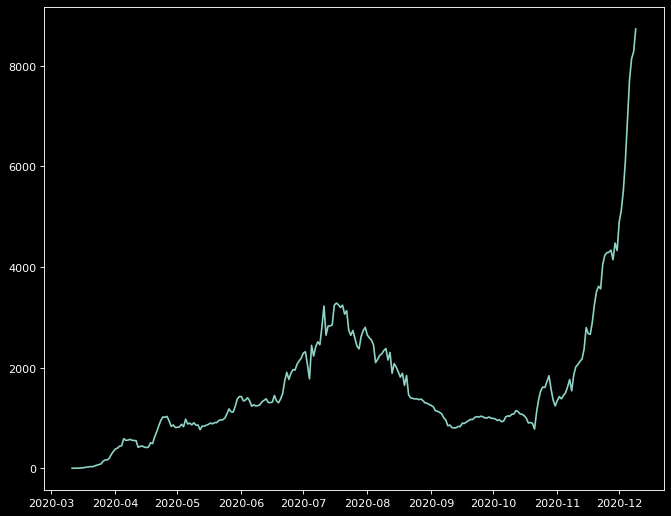

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()